In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer #字典类型特征抽取
from sklearn.model_selection import train_test_split,GridSearchCV #划分数据集,网格搜索
from sklearn.tree import DecisionTreeClassifier #分类树

In [2]:
#获取数据
taitan=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
taitan.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [5]:
#选取特征x以及目标值y
x=taitan[['pclass','age','sex']]
x['age'].fillna(x['age'].mean(),inplace=True) #填充缺失值,inplace=True是否保存
y=taitan['survived']

In [16]:
#划分测试集 和训练集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
# 特征抽取
a=x_train.to_dict(orient='records') #将数据转换为列表类型字典
b=x_test.to_dict(orient='records')
# print(a)
dv=DictVectorizer(sparse=False)
x_train=dv.fit_transform(a)
x_test=dv.transform(b)

In [11]:
dv.get_feature_names()

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [18]:
x_test

array([[36.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [20.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [22.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       ...,
       [31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [11.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]])

In [20]:
#建立模型
dt=DecisionTreeClassifier(max_depth=5) #max_depth树的深度
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
#预测
y_predict=dt.predict(x_test)
y_predict

(array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [22]:
#评估
dt.score(x_test,y_test)

0.8389057750759878

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,y_predict,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       221
           1       0.89      0.58      0.70       108

    accuracy                           0.84       329
   macro avg       0.86      0.77      0.80       329
weighted avg       0.85      0.84      0.83       329



In [25]:
from sklearn.metrics import confusion_matrix #生产混淆矩阵
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns #画图

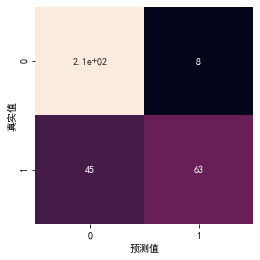

In [26]:
#设置中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10
mat=confusion_matrix(y_test,y_predict) #生成混淆矩阵
sns.heatmap(mat,square=True,annot=True,cbar=False) #annot=True加载标签，cbar=False不显示颜色标记
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

# 随机森林

In [27]:
from sklearn.ensemble import RandomForestClassifier #随机森林

In [29]:
c={'n_estimators':[120,200,300,500],'max_depth':[3,5,8,15]}
rfc=RandomForestClassifier()
gc=GridSearchCV(rfc,param_grid=c,cv=2)
gc.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 15],
                         'n_estimators': [120, 200, 300, 500]})

In [31]:
#查看模型选择的参数
gc.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [34]:
#评估
gc.score(x_test,y_test)

0.8389057750759878